In [1]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt


# Dependencies
import tweepy
import numpy as np
import pandas as pd
from datetime import datetime


# Import and Initialize Sentiment Analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

# Twitter API Keys
from Twitter_Config import (consumer_key, 
                    consumer_secret, 
                    access_token, 
                    access_token_secret)

# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [2]:
#News Organizations
Search_Terms = ('BBC', 'CBS', 'CNN', 'FOX', 'nytimes')

#list to temporarily hold results
Results_List = []

#create timestamp for visualization titles
tm = str(pd.to_datetime(datetime.now()))


# return 100 tweets for each news outlet - so 500 tweet returns total
for target in Search_Terms:
    
    oldest_tweet = None
    
    Compound_list = []
    Tweet_Number = []
    counter = 0
    
    for x in range(1):
    
        news_tweets = api.search(
            target,count=100, result_type="recent", max_id=oldest_tweet)

       

        #Loop through each tweet
        for tweet in news_tweets["statuses"]:
            
            counter = counter + 1

#             #Record Tweet ID for temporary purposes to identify the oldest tweet
#             tweet_id = tweet["id"]

            # Run Compound Vader Analysis on each tweet
            results = analyzer.polarity_scores(tweet["text"])
            Compound_list.append(results['compound'])
            Tweet_Number.append(counter)

            Sentiment = {
                "Company":target,
                "Compound Result": Compound_list,
                "Tweet Number": Tweet_Number}
            
            oldest_tweet = tweet["id"] - 1

      
    
    Results_List.append(Sentiment)
    print(f"{target} has {len(Compound_list)} results and the last tweet counter is {counter}")






BBC has 100 results and the last tweet counter is 100
CBS has 100 results and the last tweet counter is 100
CNN has 100 results and the last tweet counter is 100
FOX has 100 results and the last tweet counter is 100
nytimes has 100 results and the last tweet counter is 100


In [3]:
#Create individual DataFrames for Scatter Plot

BBC_DF = pd.DataFrame(Results_List[0])
CBS_DF = pd.DataFrame(Results_List[1])
CNN_DF = pd.DataFrame(Results_List[2])
Fox_DF = pd.DataFrame(Results_List[3])
NYT_DF = pd.DataFrame(Results_List[4])

NYT_DF.head()                      

,Company,Compound Result,Tweet Number
0,nytimes,-0.6486,1
1,nytimes,-0.2960,2
2,nytimes,0.5106,3
3,nytimes,-0.2960,4
4,nytimes,0.0000,5


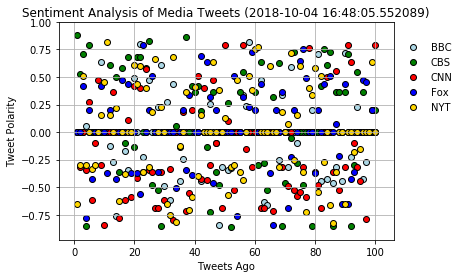

In [7]:
#Scatter Plot
#Defining the the X axis for all plots 
x_axis = list(range(1,101))

# misc. scatter plot attributes
plt.title(f"Sentiment Analysis of Media Tweets ({tm})")

#Creating Y axis
BBCY_Axis = BBC_DF['Compound Result']
CBSY_Axis = CBS_DF['Compound Result']
CNNY_Axis = CNN_DF['Compound Result']
FoxY_Axis = Fox_DF['Compound Result']
NYTY_Axis = NYT_DF['Compound Result']


# Build the scatter plots for each news organization
BBC_Scatter = plt.scatter(x_axis, BBCY_Axis,
                            marker = "o",
                            facecolors = "lightblue",
                            edgecolors = "black",
                            label = 'BBC')
CBS_Scatter = plt.scatter(x_axis, CBSY_Axis,
                            marker = "o",
                            facecolors = "green",
                            edgecolors = "black",
                            label = 'CBS')
CNN_Scatter = plt.scatter(x_axis, CNNY_Axis,
                            marker = "o",
                            facecolors = "red",
                            edgecolors = "black",
                            label = 'CNN')
Fox_Scatter = plt.scatter(x_axis, FoxY_Axis,
                            marker = "o",
                            facecolors = "blue",
                            edgecolors = "black",
                            label = 'Fox')
NYT_Scatter = plt.scatter(x_axis, NYTY_Axis,
                            marker = "o",
                            facecolors = "gold",
                            edgecolors = "black",
                            label = 'NYT')

# Create a legend for our chart
plt.legend(loc='center left',
           bbox_to_anchor=(1, .75),
           frameon=False)
plt.xlabel('Tweets Ago')
plt.ylabel('Tweet Polarity')
plt.grid(True)
plt.savefig("Overall_Media_Sentiment_Scatter_Plot.png")
plt.show()

In [5]:
#Average Compound Numbers for each target

#Create a dictionary so numbers are paired and can be used elsewhere
news_tempDict = {
            "BBC" : BBC_DF["Compound Result"].mean(),
            "CBS" : CBS_DF["Compound Result"].mean(),
            "CNN" : CNN_DF["Compound Result"].mean(),
            "Fox" : Fox_DF["Compound Result"].mean(),
            "NYT" : NYT_DF["Compound Result"].mean()}

#Create a list of the values for the bar chart

names = news_tempDict.keys()

#Variable for compound results
#FYI - not sure why I had to convert the list into a series, but it wouldn't work without converting it
results=list(news_tempDict.values())
results_2 = pd.Series(results)

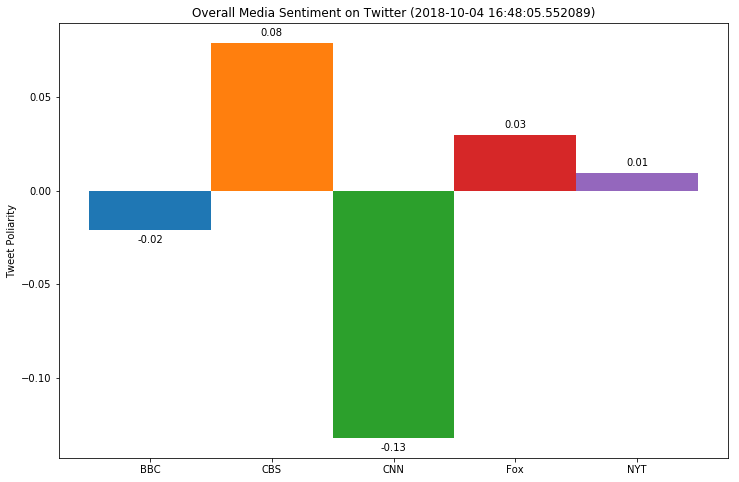

In [6]:
# Plot the figure.
plt.figure(figsize=(12, 8))
ax = results_2.plot(kind='bar', width=1)
ax.set_title(f"Overall Media Sentiment on Twitter ({tm})")
ax.set_ylabel('Tweet Poliarity')
ax.set_xticklabels(names)



rects = ax.patches

# For each bar: Place a label
for rect in rects:
    # Get X and Y placement of label from rect.
    y_value = rect.get_height()
    x_value = rect.get_x() + rect.get_width() / 2

    # Number of points between bar and label. Change to your liking.
    space = 5
    # Vertical alignment for positive values
    va = 'bottom'

    # If value of bar is negative: Place label below bar
    if y_value < 0:
        # Invert space to place label below
        space *= -1
        # Vertically align label at top
        va = 'top'

    # Use Y value as label and format number with one decimal place
    label = "{:.2f}".format(y_value)

    # Create annotation
    plt.annotate(
        label,                      # Use `label` as label
        (x_value, y_value),         # Place label at end of the bar
        xytext=(0, space),          # Vertically shift label by `space`
        textcoords="offset points", # Interpret `xytext` as offset in points
        ha='center',                # Horizontally center label
        va=va)                      # Vertically align label differently for
                                    # positive and negative values.
plt.xticks(rotation='horizontal')
plt.savefig("Overall_Media_Sentiment_Bar_Chart.png")